In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera
import seaborn as sns

In [2]:
##############################################
# DEMONSTRATION OF THE CENTRAL LIMIT THEOREM #
##############################################

# Let's create some distributions

normal_distribution = np.random.normal(0, 1, 5000)
uniform_distribution = np.random.uniform(0, 1, 5000)
left_skewed_distribution = np.random.exponential(1, 5000)
binomial_distribution = np.random.binomial(1, 0.5, 5000)
poisson_distribution = np.random.poisson(1, 5000)

In [74]:
# Let's create a function that will take a distribution and return the mean of the distribution
sample_size = 100

def get_sample_mean(distribution, sample_size):
    means = []
    for _ in range(31): # Sampling the distribution 30 times
        sample = np.random.choice(distribution, sample_size)
        mean = np.mean(sample)
        means.append(mean)
        
    return means

In [75]:
distributions = [normal_distribution, uniform_distribution, left_skewed_distribution, poisson_distribution]
dist_means = [get_sample_mean(dist, sample_size) for dist in distributions]

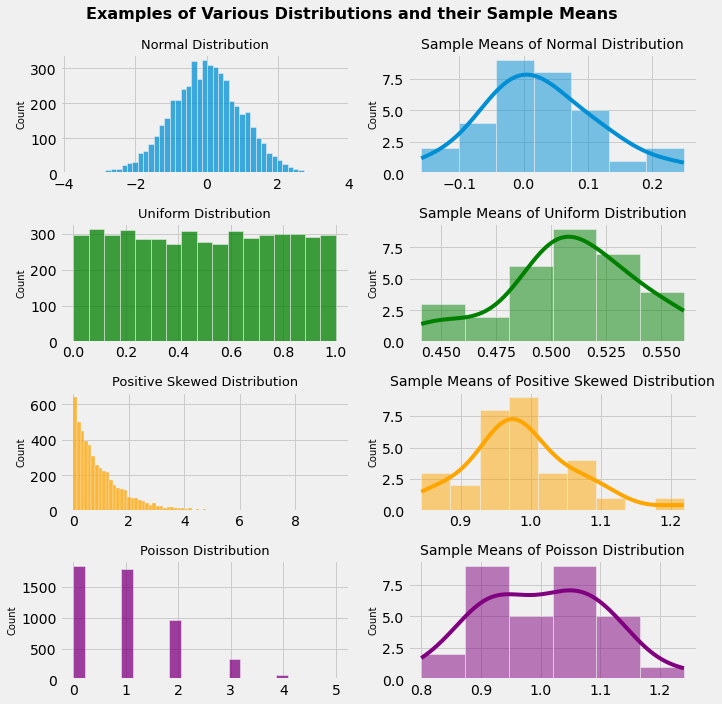

In [76]:
# Combining the graphs into one
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(4,2, figsize=(10, 10))

sns.histplot(normal_distribution, ax=ax[0, 0])
sns.histplot(dist_means[0], ax=ax[0, 1], kde=True)
ax[0, 0].set_title("Normal Distribution", fontsize=13)
ax[0, 1].set_title("Sample Means of Normal Distribution", fontsize=14)
ax[0, 0].set_ylabel("Count", fontsize=10)
ax[0, 1].set_ylabel("Count", fontsize=10)

sns.histplot(uniform_distribution, ax=ax[1, 0], color="green")
sns.histplot(dist_means[1], ax=ax[1, 1], kde=True, color="green")
ax[1, 0].set_title("Uniform Distribution", fontsize=13)
ax[1, 1].set_title("Sample Means of Uniform Distribution", fontsize=14)
ax[1, 0].set_ylabel("Count", fontsize=10)
ax[1, 1].set_ylabel("Count", fontsize=10)

sns.histplot(left_skewed_distribution, ax=ax[2, 0], color="orange")
sns.histplot(dist_means[2], ax=ax[2, 1], kde=True, color="orange")
ax[2, 0].set_title("Positive Skewed Distribution", fontsize=13)
ax[2, 1].set_title("Sample Means of Positive Skewed Distribution", fontsize=14)
ax[2, 0].set_ylabel("Count", fontsize=10)
ax[2, 1].set_ylabel("Count", fontsize=10)

sns.histplot(poisson_distribution, ax=ax[3, 0], color="purple")
sns.histplot(dist_means[3], ax=ax[3, 1], kde=True, color="purple")
ax[3, 0].set_title("Poisson Distribution", fontsize=13)
ax[3, 1].set_title("Sample Means of Poisson Distribution", fontsize=14)
ax[3, 0].set_ylabel("Count", fontsize=10)
ax[3, 1].set_ylabel("Count", fontsize=10)


plt.suptitle("Examples of Various Distributions and their Sample Means", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

In [6]:
# Let's visualize what happens when you increase the sample size
sample_sizes = np.arange(10, 200, 10)

increasing_samples_size_means = [get_sample_mean(dist, sample_size) for sample_size in sample_sizes for dist in distributions]


In [7]:
# for sample_size in sample_sizes:
#     dist_means = [get_sample_mean(dist, sample_size) for dist in distributions]
# dist_means

MovieWriter imagemagick unavailable; using Pillow instead.


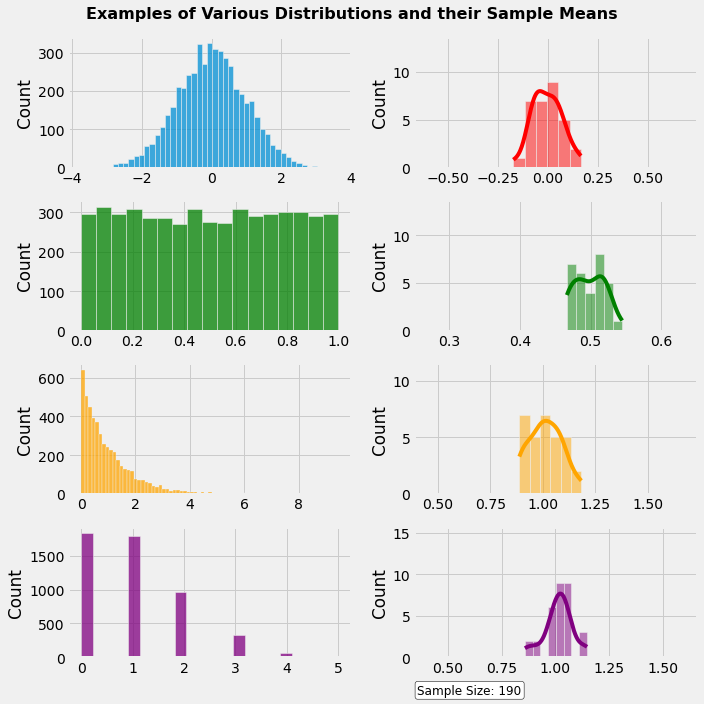

In [77]:
# Let's visualize the sample means
# creating an animated graph of the sample means as the sample size increases

# Creating the figure
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(4,2, figsize=(10, 10))

camera = Camera(fig)

for i in range(0, len(increasing_samples_size_means), 4):
    sns.histplot(increasing_samples_size_means[i], ax=ax[0, 1], kde=True, color="red")
    sns.histplot(increasing_samples_size_means[i+1], ax=ax[1, 1], kde=True, color="green")
    sns.histplot(increasing_samples_size_means[i+2], ax=ax[2, 1], kde=True,  color="orange")
    sns.histplot(increasing_samples_size_means[i+3], ax=ax[3, 1], kde=True,  color="purple")
    
    sns.histplot(normal_distribution, ax=ax[0, 0])
    sns.histplot(uniform_distribution, ax=ax[1, 0], color="green")
    sns.histplot(left_skewed_distribution, ax=ax[2, 0], color="orange")
    sns.histplot(poisson_distribution, ax=ax[3, 0], color="purple")
    
    plt.suptitle("Examples of Various Distributions and their Sample Means", fontsize=16, fontweight="bold")
    plt.text(.6, -4, f"Sample Size: {sample_sizes[i//4]}", fontsize=12, ha="center", va="center", bbox=dict(boxstyle="round", fc="w", ec="k", pad=0.2))
    
    plt.tight_layout()

    camera.snap()
    
animation = camera.animate(interval=1000, repeat_delay=100)
animation.save('sample_means.gif', writer = 'imagemagick')